In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

In [10]:
with open('../input/classification_classes_ILSVRC2012.txt','r') as f:
    image_net_names = f.read().split('\n')

class_names = image_net_names[:-1]

print('No.of Classes are ' +str(len(class_names)) + ', Sample class is :' + str(class_names[96])  )

No.of Classes are 1000, Sample class is :toucan


In [11]:
config_file = '../models/DenseNet_121.prototxt'
model_file = '../models/DenseNet_121.caffemodel'

In [12]:
model = cv2.dnn.readNet(model= model_file,config=config_file,framework = 'Caffe')

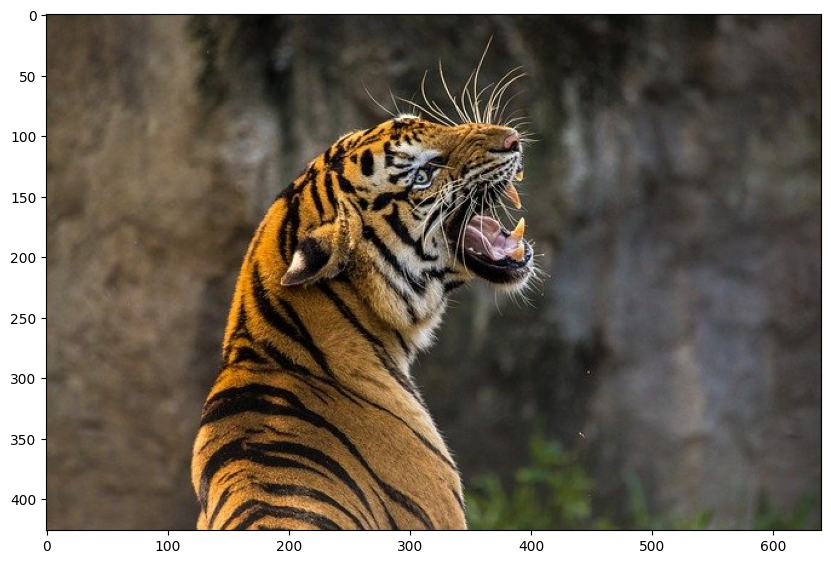

In [13]:
tiger_img = cv2.imread('../input/image1.jpg')
plt.figure(figsize=(10,10))
plt.imshow(tiger_img[:,:,::-1])
plt.show()

In [14]:
blob = cv2.dnn.blobFromImage(image = tiger_img, scalefactor = 0.017, mean = (104, 117, 123), swapRB = False, crop = False)

In [15]:
model.setInput(blob)

In [16]:
outputs = model.forward()

In [17]:
final_outputs = outputs[0]

In [18]:
final_outputs = final_outputs.reshape(1000, 1)

In [19]:
label_id = np.argmax(final_outputs)

In [20]:
probs = np.exp(final_outputs) / np.sum(np.exp(final_outputs))

print(probs[0:10])

print('Maximum probability : ',np.max(probs))

[[3.09011375e-04]
 [2.35898187e-04]
 [6.04857159e-05]
 [9.49772802e-05]
 [7.83263094e-05]
 [1.12772985e-04]
 [2.86146260e-05]
 [1.51731889e-03]
 [1.42757082e-03]
 [1.50658295e-03]]
Maximum probability :  0.20289785


In [21]:
final_prob = np.max(probs) * 100

In [22]:
out_name = class_names[label_id]

In [23]:
out_text = f'{out_name} , {final_prob}'

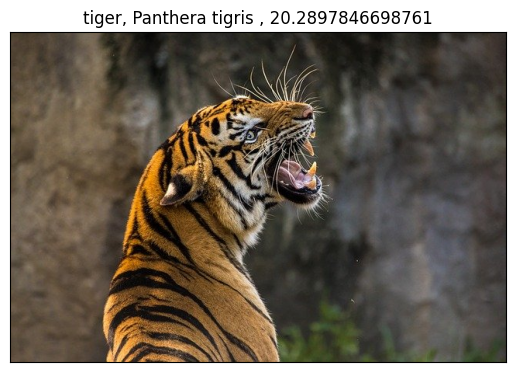

In [24]:
plt.imshow(tiger_img[:,:,::-1])
plt.title(out_text)
plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
#Image inference utility 

def classify(img):
    image = img.copy()
    blob = cv2.dnn.blobFromImage(image = image, scalefactor = 0.017, size = (224, 224), mean = (104, 117, 123))
    model.setInput(blob)
    outputs = model.forward()
    final_output = outputs[0]
    final_output = final_output.reshape(1000,1)
    label_id = np.argmax(final_output)
    probs = np.exp(final_output) / np.sum(np.exp(final_output))
    final_prob = np.max(probs) * 100
    out_name = class_names[label_id]
    out_text = f'{out_name} : {final_prob}'
    return out_text
    
    

In [40]:
images = []

imageClasses = []

for img_pth in glob.glob('../input/*.jpg'):
    img = cv2.imread(img_pth)
    image = img.copy()
    images.append(image)
    print('Classifying '+img_pth)
    imageClasses.append(classify(image))
  

Classifying ../input\12170671_1646044508984163_1957578044_n.jpg
Classifying ../input\ice-flakes-microscopy-salt-and-pepper-noise.jpg
Classifying ../input\image1.jpg
Classifying ../input\image2.jpg
Classifying ../input\image3.jpg
Classifying ../input\image4.jpg
Classifying ../input\image5.jpg
Classifying ../input\image6.jpg


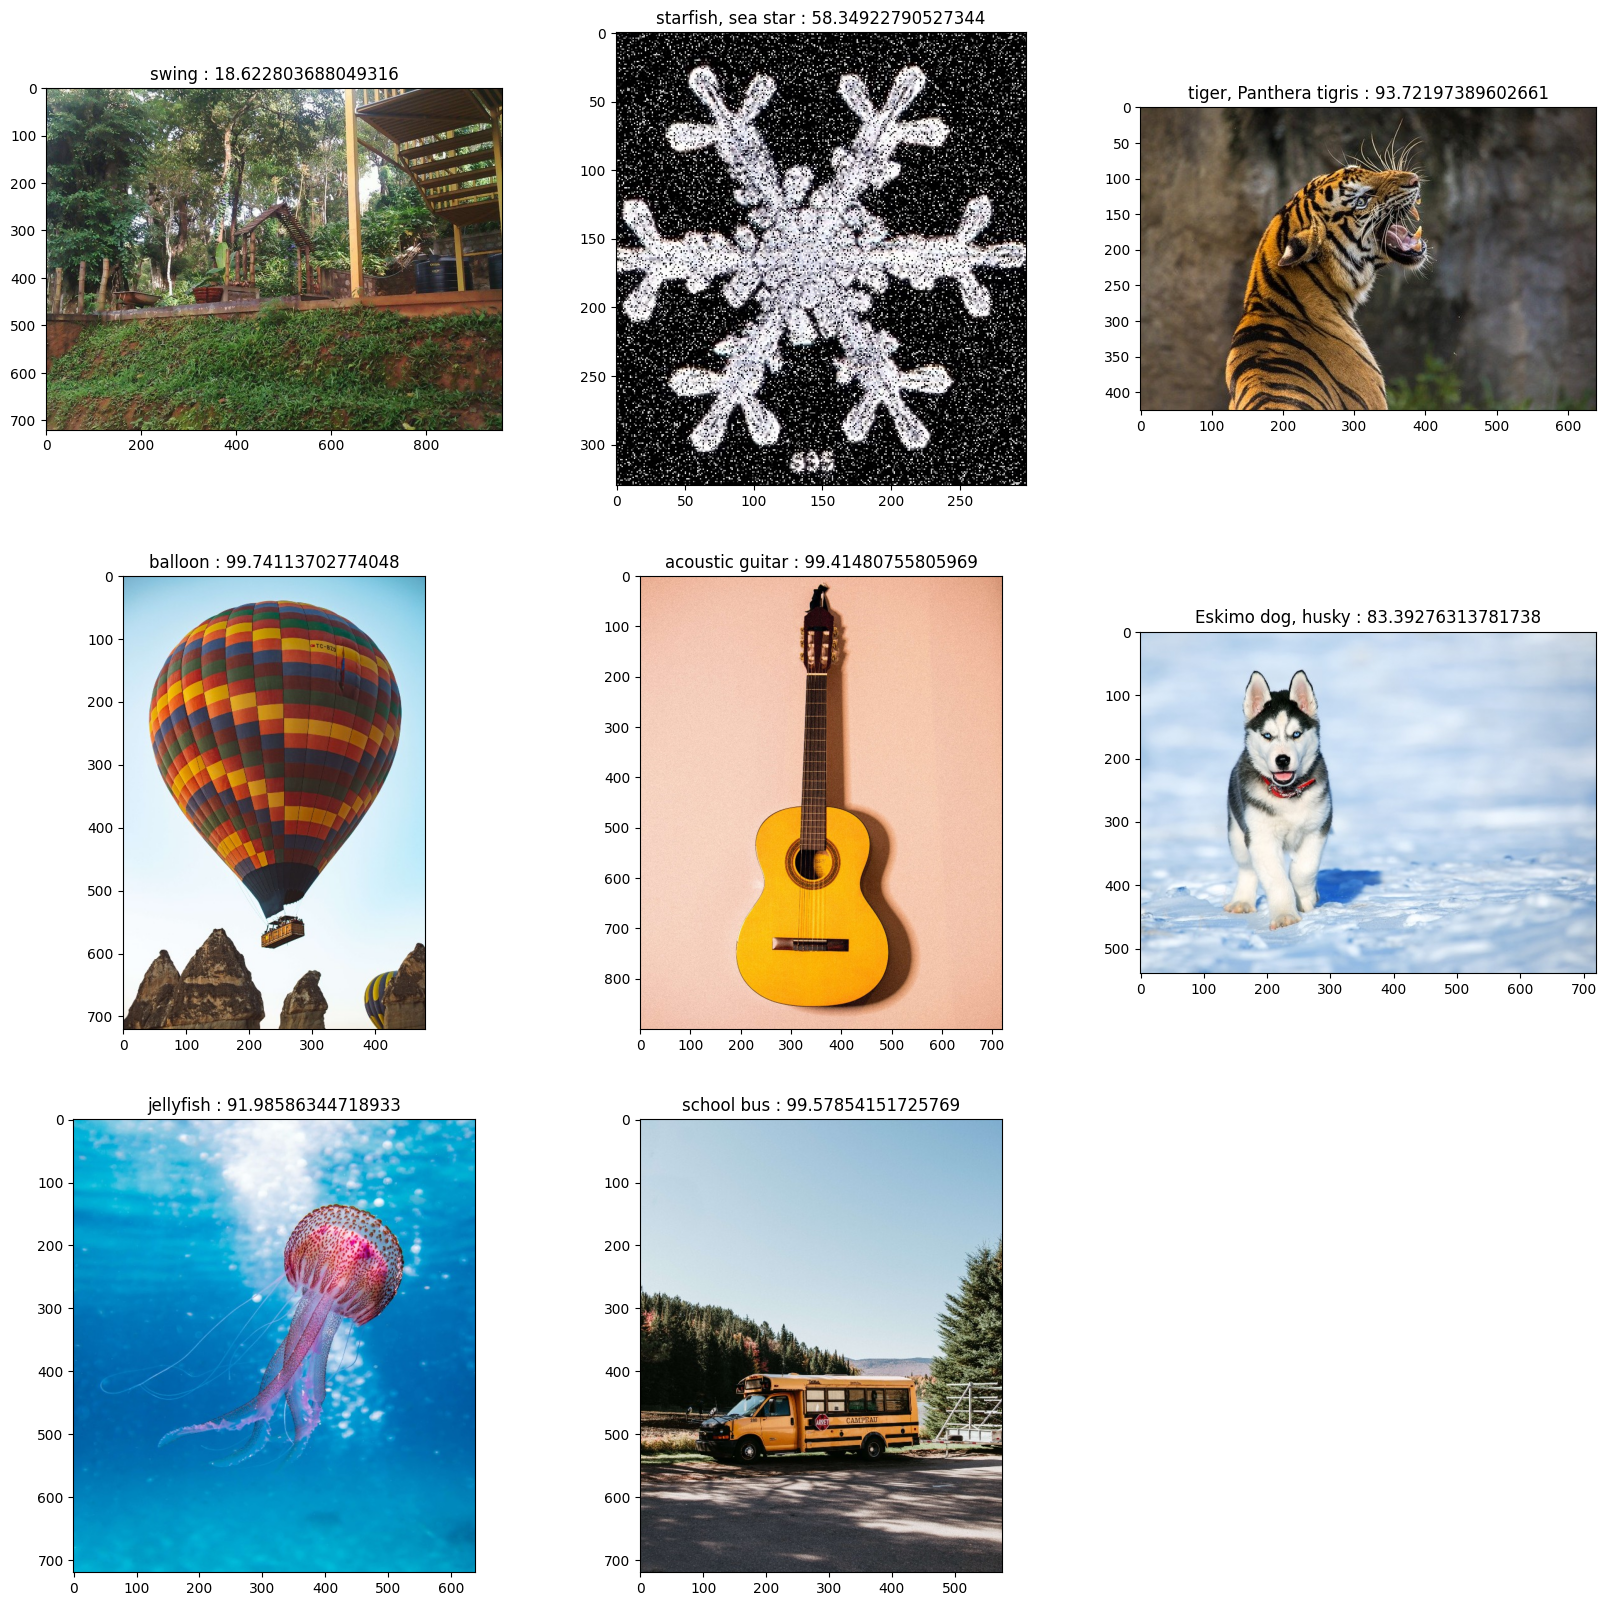

In [41]:
plt.figure(figsize=(20,20))
plot_count = int(len(images) / 3) + 1

for i , image in enumerate(images):
    plt.subplot(plot_count , 3, i + 1)
    plt.imshow(image[:,:,::-1])
    plt.title(imageClasses[i])
    #plt.xticks([])
    #plt.yticks([])